In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#! pip install networkx

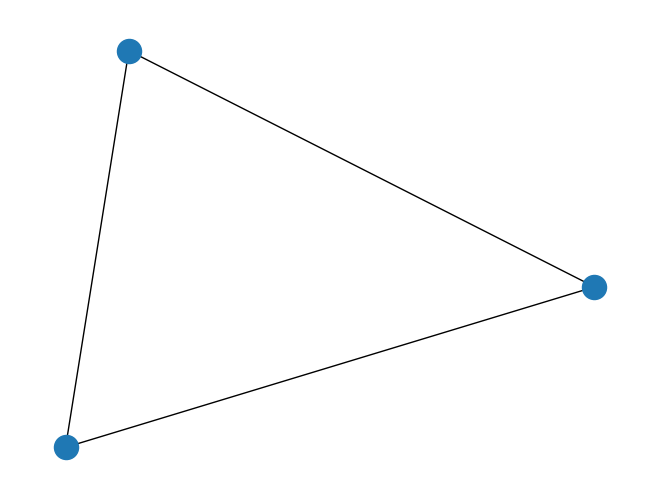

In [3]:
#Create Simple graph with some attributes
G = nx.Graph()
  
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
nx.draw(G)


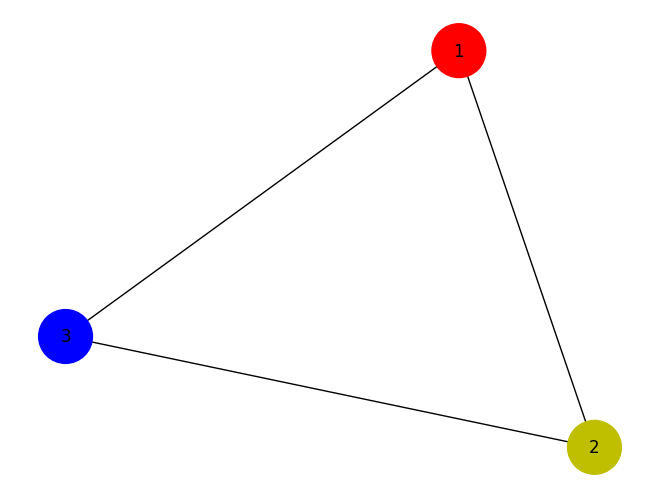

In [4]:
nx.draw(G,with_labels=True,node_size=1500,node_color=['r','y','b'])
plt.show()

{(1, 2): 0.30303030303030304,
 (1, 3): 0.030303030303030304,
 (1, 4): 0.16666666666666669,
 (1, 5): 0.09090909090909091,
 (2, 3): 0.18181818181818182,
 (2, 7): 0.5303030303030303,
 (3, 5): 0.07575757575757576,
 (6, 7): 0.09090909090909091,
 (6, 9): 0.06060606060606061,
 (6, 8): 0.015151515151515152,
 (7, 8): 0.09090909090909091,
 (7, 9): 0.36363636363636365,
 (8, 9): 0.06060606060606061,
 (9, 12): 0.4090909090909091,
 (10, 11): 0.015151515151515152,
 (10, 12): 0.15151515151515152,
 (11, 12): 0.15151515151515152}

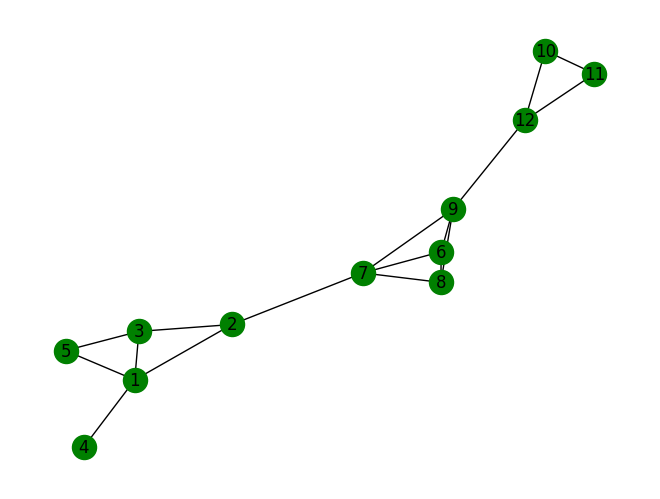

In [5]:
G.add_edges_from([[1,2], [2,3], [1,3],[1,4], [1,5],[3,5], [6,7], [7,8], [8,9], [6,9], [6,8], [7,9], [10,11], [11,12], 
                 [10,12],[9,12],[2,7]])

nx.draw(G,with_labels=True, node_color='green')
nx.edge_betweenness_centrality(G)

(2, 7)
(9, 12)
Test


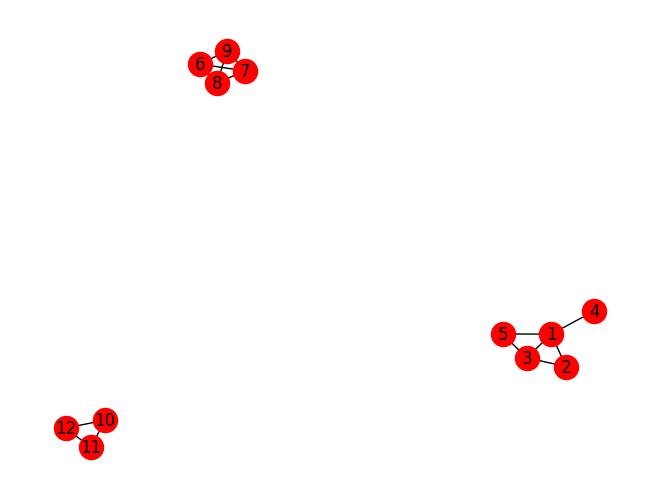

In [6]:
NUM_ITERATIONS = 2
for i in range (NUM_ITERATIONS):
    edge_betweennness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted (edge_betweennness, key = lambda pair: -pair[1])[0][0]
    print(edge_to_delete)
    G.remove_edge(*edge_to_delete)
    
nx.draw(G,with_labels=True, node_color='red')
print ("Test")

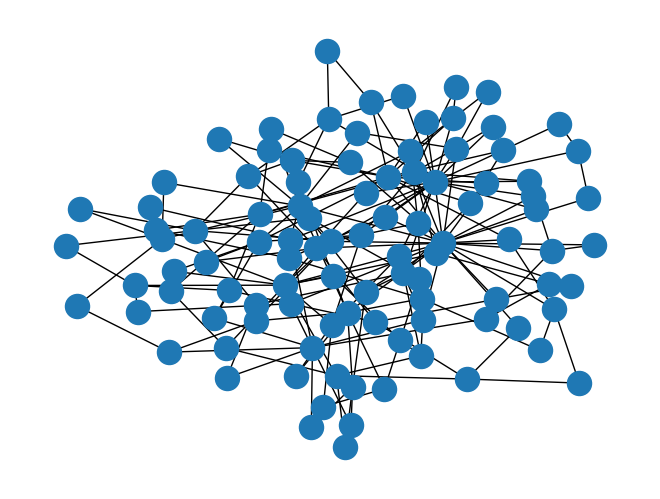

In [7]:
G = nx.barabasi_albert_graph(100,2)
nx.draw_spring(G);

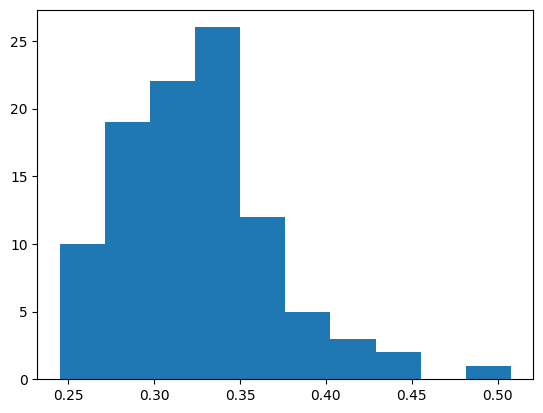

In [8]:
plt.hist(nx.centrality.closeness_centrality(G).values());

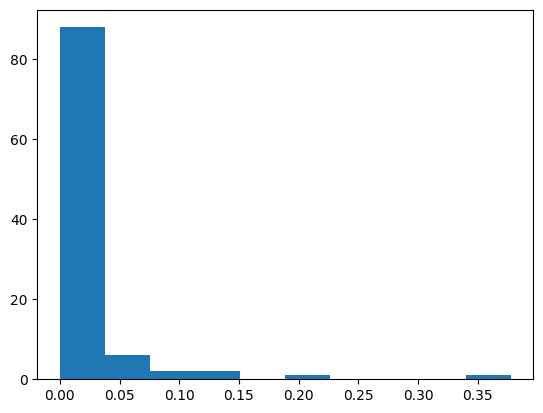

In [9]:
plt.hist(nx.centrality.betweenness_centrality(G).values());

In [10]:
# social network

In [11]:
import pandas as pd
import networkx as nx
import warnings

In [14]:
hero = pd.read_csv("hero-network.csv")
edge = pd.read_csv("edges.csv")
node = pd.read_csv("nodes.csv")

In [15]:
hero.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [16]:
edge.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [17]:
node.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [19]:
Thor = hero[hero['hero1']=='THOR/DR. DONALD BLAK'].sample(25)
Cap = Subset = hero[hero['hero1']=='CAPTAIN AMERICA'].sample(25)
IronMan = hero[hero['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)

In [20]:
Subset = pd.concat([Thor,Cap,IronMan],axis = 0)

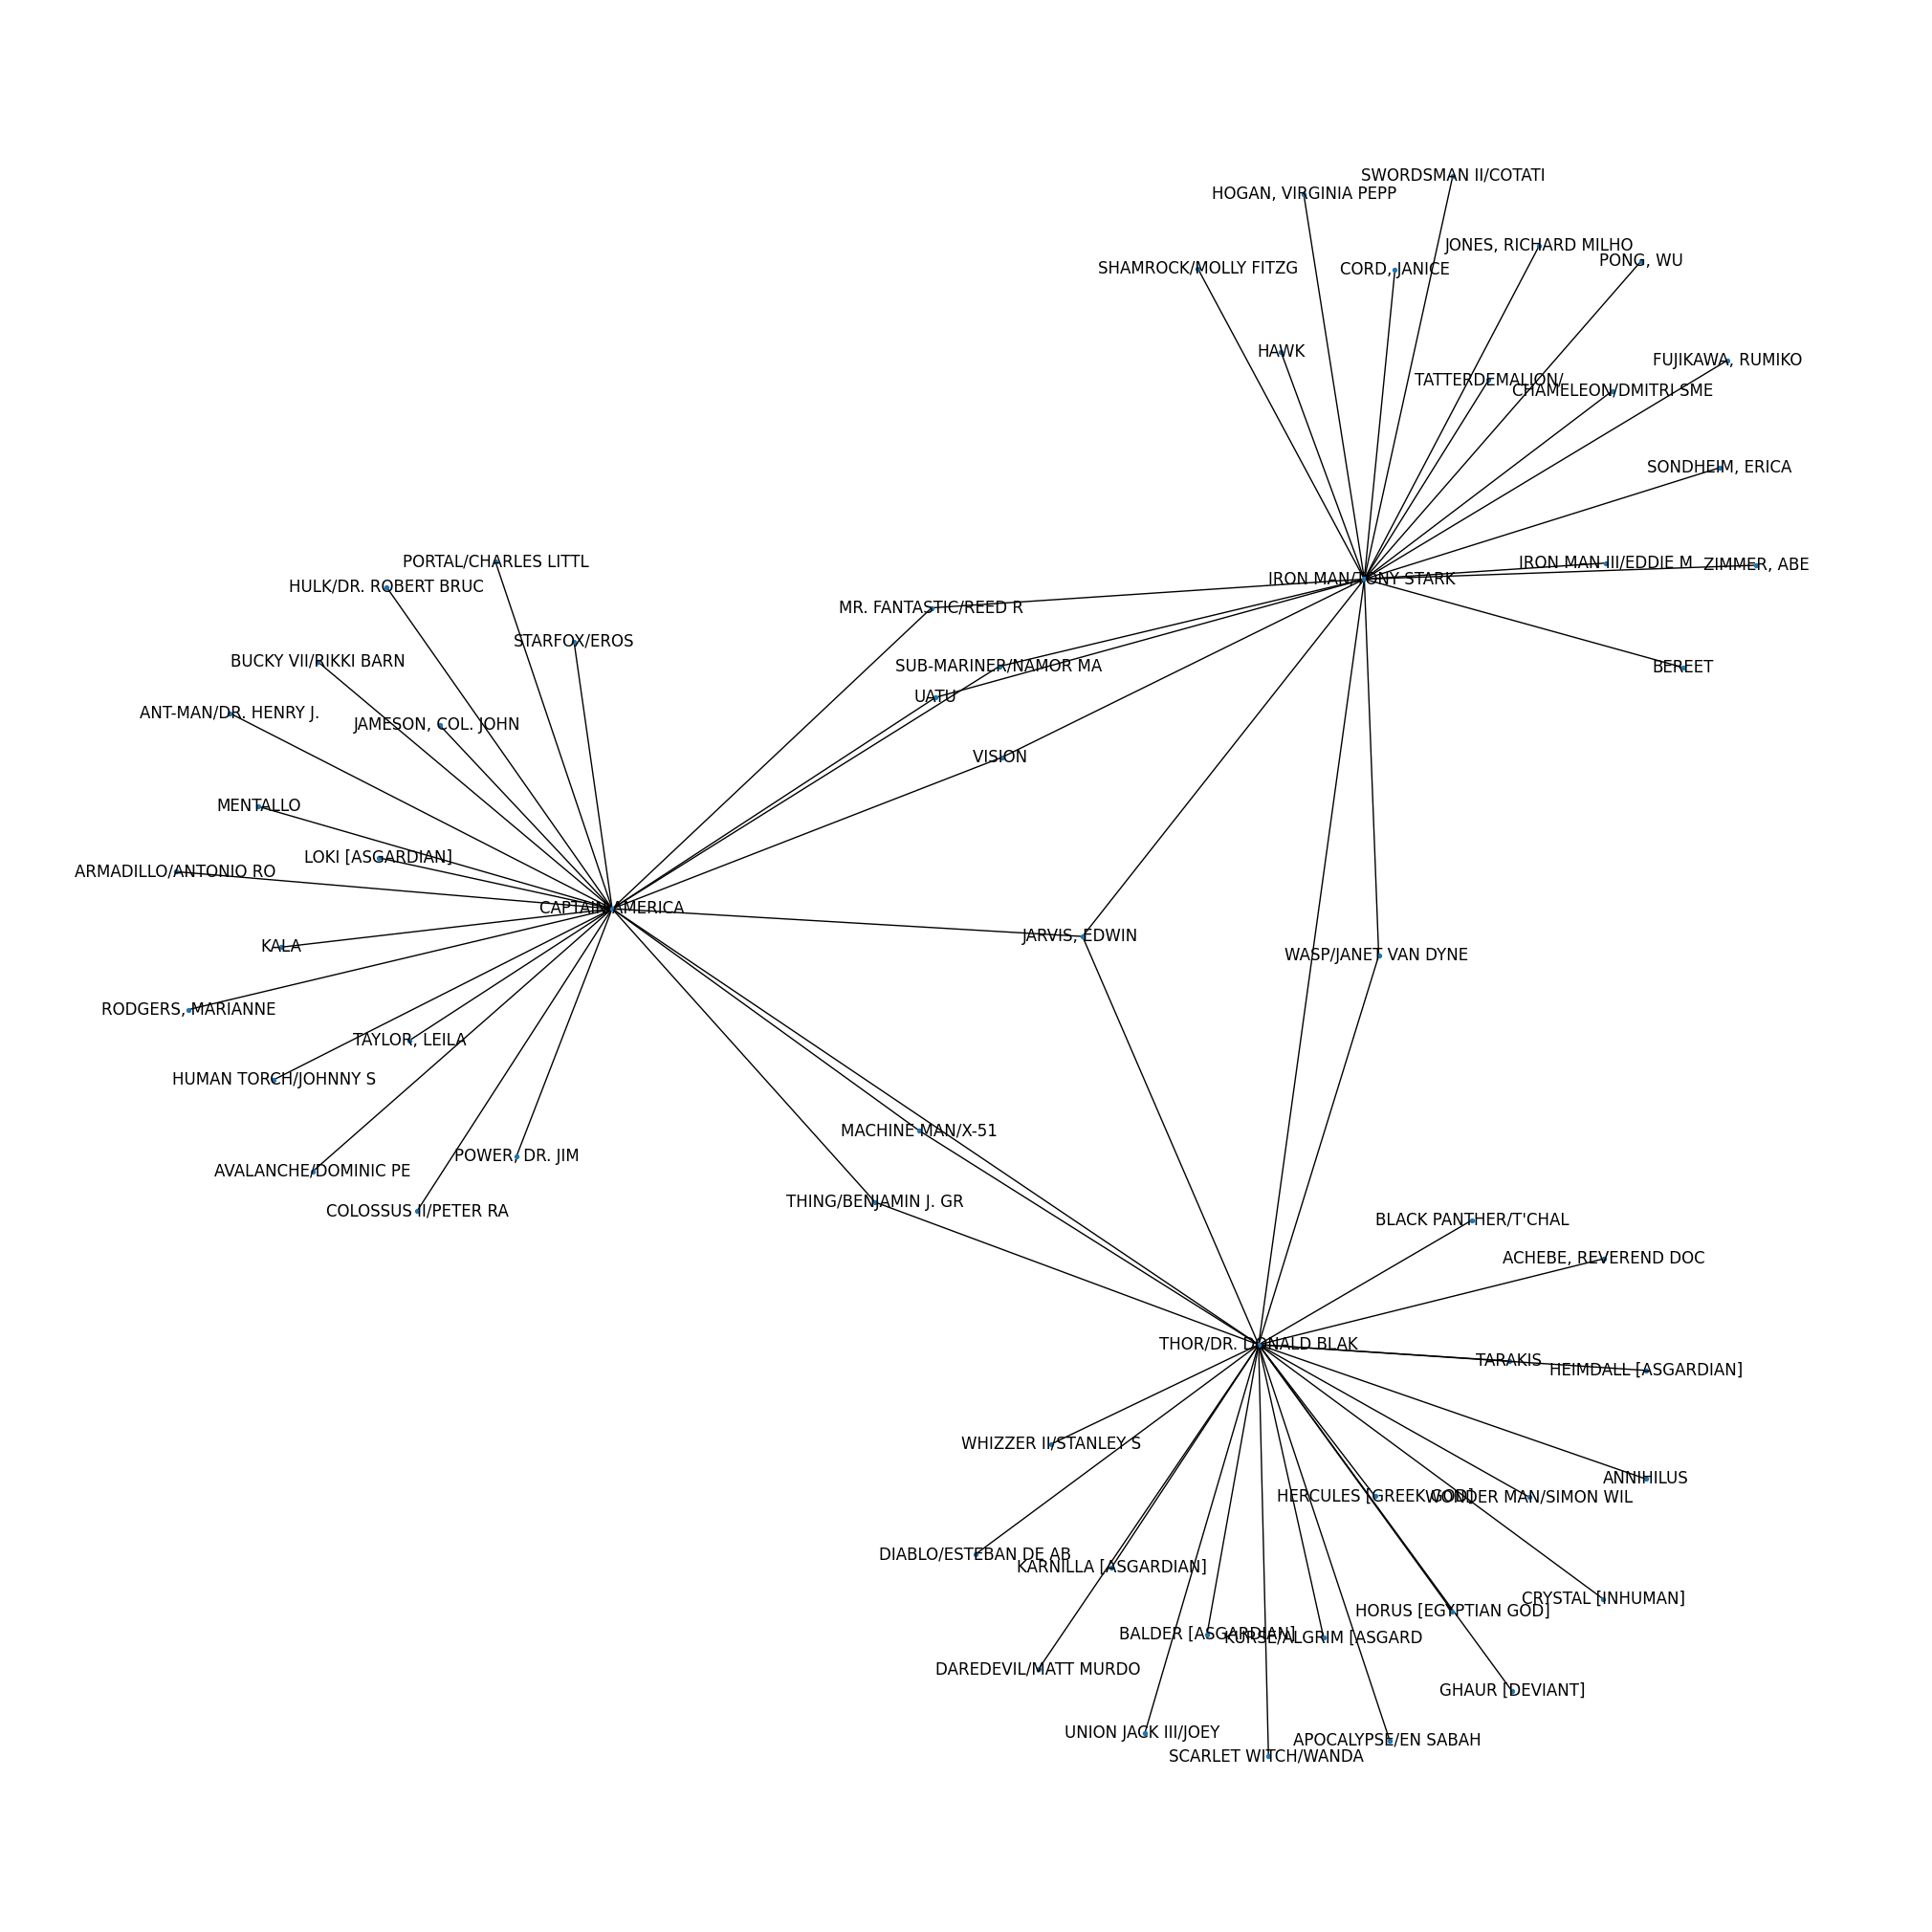

In [21]:
G=nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [22]:
nx.betweenness_centrality(G)

{'THOR/DR. DONALD BLAK': 0.5987726475745175,
 'BALDER [ASGARDIAN]': 0.0,
 'CAPTAIN AMERICA': 0.5040911747516073,
 'KURSE/ALGRIM [ASGARD': 0.0,
 'DAREDEVIL/MATT MURDO': 0.0,
 'WONDER MAN/SIMON WIL': 0.0,
 'TARAKIS': 0.0,
 'WASP/JANET VAN DYNE ': 0.0,
 'ANNIHILUS': 0.0,
 'KARNILLA [ASGARDIAN]': 0.0,
 'APOCALYPSE/EN SABAH ': 0.0,
 'HERCULES [GREEK GOD]': 0.0,
 'CRYSTAL [INHUMAN]': 0.0,
 'HEIMDALL [ASGARDIAN]': 0.0,
 'WHIZZER II/STANLEY S': 0.0,
 'THING/BENJAMIN J. GR': 0.0,
 'HORUS [EGYPTIAN GOD]': 0.0,
 'MACHINE MAN/X-51': 0.0,
 'ACHEBE, REVEREND DOC': 0.0,
 'GHAUR [DEVIANT]': 0.0,
 "BLACK PANTHER/T'CHAL": 0.0,
 'UNION JACK III/JOEY ': 0.0,
 'JARVIS, EDWIN ': 0.024839275277615425,
 'SCARLET WITCH/WANDA ': 0.0,
 'DIABLO/ESTEBAN DE AB': 0.0,
 'JAMESON, COL. JOHN ': 0.0,
 'PORTAL/CHARLES LITTL': 0.0,
 'SUB-MARINER/NAMOR MA': 0.024839275277615425,
 'TAYLOR, LEILA': 0.0,
 'ANT-MAN/DR. HENRY J.': 0.0,
 'VISION ': 0.024839275277615425,
 'BUCKY VII/RIKKI BARN': 0.0,
 'UATU': 0.024839275277615425

In [23]:
best_connector = nx.betweenness_centrality(G)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

THOR/DR. DONALD BLAK 0.5987726475745175
CAPTAIN AMERICA 0.5040911747516073
IRON MAN/TONY STARK  0.4503214494447691
JARVIS, EDWIN  0.024839275277615425
SUB-MARINER/NAMOR MA 0.024839275277615425
VISION  0.024839275277615425
UATU 0.024839275277615425
MR. FANTASTIC/REED R 0.024839275277615425
BALDER [ASGARDIAN] 0.0
KURSE/ALGRIM [ASGARD 0.0
DAREDEVIL/MATT MURDO 0.0
WONDER MAN/SIMON WIL 0.0
TARAKIS 0.0
WASP/JANET VAN DYNE  0.0
ANNIHILUS 0.0
KARNILLA [ASGARDIAN] 0.0
APOCALYPSE/EN SABAH  0.0
HERCULES [GREEK GOD] 0.0
CRYSTAL [INHUMAN] 0.0
HEIMDALL [ASGARDIAN] 0.0
WHIZZER II/STANLEY S 0.0
THING/BENJAMIN J. GR 0.0
HORUS [EGYPTIAN GOD] 0.0
MACHINE MAN/X-51 0.0
ACHEBE, REVEREND DOC 0.0
GHAUR [DEVIANT] 0.0
BLACK PANTHER/T'CHAL 0.0
UNION JACK III/JOEY  0.0
SCARLET WITCH/WANDA  0.0
DIABLO/ESTEBAN DE AB 0.0
JAMESON, COL. JOHN  0.0
PORTAL/CHARLES LITTL 0.0
TAYLOR, LEILA 0.0
ANT-MAN/DR. HENRY J. 0.0
BUCKY VII/RIKKI BARN 0.0
POWER, DR. JIM 0.0
MENTALLO 0.0
HUMAN TORCH/JOHNNY S 0.0
LOKI [ASGARDIAN] 0.0
STA

In [24]:
nx.clustering

<function networkx.algorithms.cluster.clustering(G, nodes=None, weight=None)>

In [25]:
nx.clustering(G)

{'THOR/DR. DONALD BLAK': 0.016666666666666666,
 'BALDER [ASGARDIAN]': 0,
 'CAPTAIN AMERICA': 0.010869565217391304,
 'KURSE/ALGRIM [ASGARD': 0,
 'DAREDEVIL/MATT MURDO': 0,
 'WONDER MAN/SIMON WIL': 0,
 'TARAKIS': 0,
 'WASP/JANET VAN DYNE ': 1.0,
 'ANNIHILUS': 0,
 'KARNILLA [ASGARDIAN]': 0,
 'APOCALYPSE/EN SABAH ': 0,
 'HERCULES [GREEK GOD]': 0,
 'CRYSTAL [INHUMAN]': 0,
 'HEIMDALL [ASGARDIAN]': 0,
 'WHIZZER II/STANLEY S': 0,
 'THING/BENJAMIN J. GR': 1.0,
 'HORUS [EGYPTIAN GOD]': 0,
 'MACHINE MAN/X-51': 1.0,
 'ACHEBE, REVEREND DOC': 0,
 'GHAUR [DEVIANT]': 0,
 "BLACK PANTHER/T'CHAL": 0,
 'UNION JACK III/JOEY ': 0,
 'JARVIS, EDWIN ': 0.6666666666666666,
 'SCARLET WITCH/WANDA ': 0,
 'DIABLO/ESTEBAN DE AB': 0,
 'JAMESON, COL. JOHN ': 0,
 'PORTAL/CHARLES LITTL': 0,
 'SUB-MARINER/NAMOR MA': 0,
 'TAYLOR, LEILA': 0,
 'ANT-MAN/DR. HENRY J.': 0,
 'VISION ': 0,
 'BUCKY VII/RIKKI BARN': 0,
 'UATU': 0,
 'POWER, DR. JIM': 0,
 'MENTALLO': 0,
 'HUMAN TORCH/JOHNNY S': 0,
 'LOKI [ASGARDIAN]': 0,
 'STARFOX/E